<a href="https://colab.research.google.com/github/PANKAJ-GUPTA-201998/Graph/blob/main/memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#!pip install pmdarima

In [25]:
# Import Libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [26]:
do = pd.read_csv('/content/ACTUAL_DATASET.csv')
data =do.iloc[:1440]
del data['CPU']
data.columns = ['Time','Request']
data['Time'] = pd.to_datetime(data['Time'], format='%d.%m.%Y %H:%M:%S')
Time = data.pop('Time')
data.head()

,Request
0,739
1,963
2,824
3,499
4,292


In [44]:
data.mean()

Request    337.9125
dtype: float64

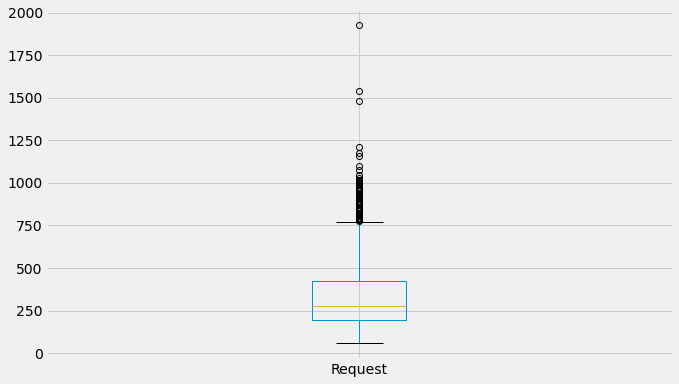

In [45]:
data.boxplot()

In [46]:
import numpy as np
for x in ['Request']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [47]:
data.isnull().sum()

Request    71
dtype: int64

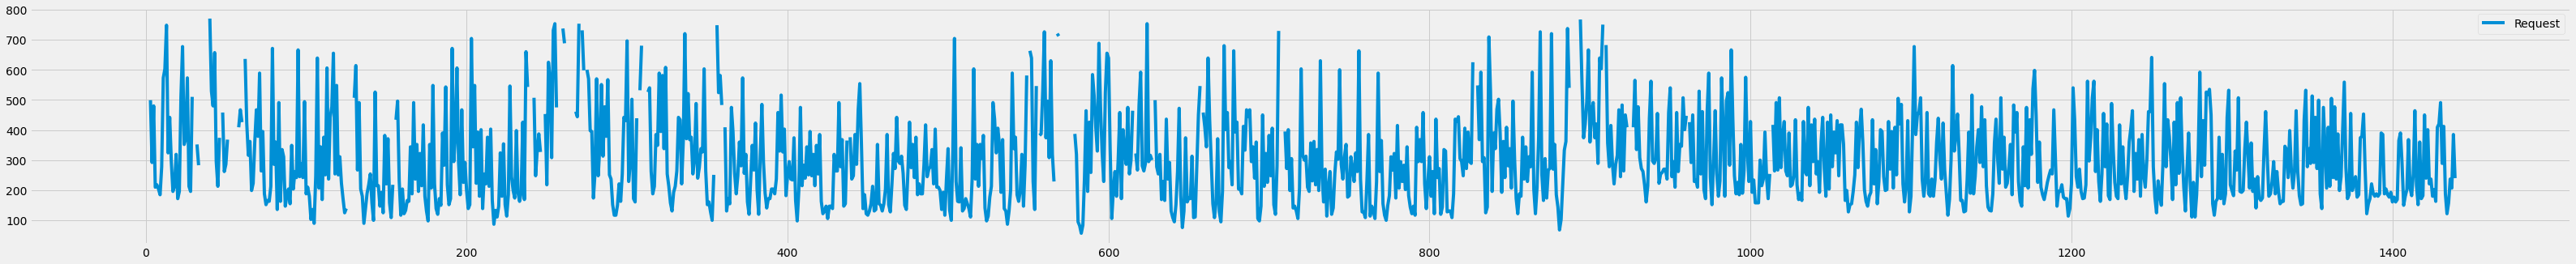

In [48]:
data.plot(figsize=(50,5))

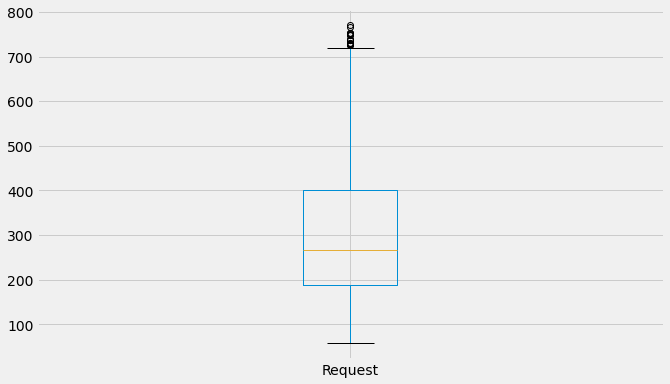

In [49]:
data.boxplot()

In [50]:
data.mean()

Request    306.71439
dtype: float64

In [ ]:
!pip install fancyimpute
from sklearn.impute import KNNImputer
from fancyimpute import KNN
missing_col = ['Request']
for i in missing_col:
 data.loc[data.loc[:,i].isnull(),i]=data.loc[:,i].mean()

In [53]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data)

print('ADF Statistic: %f' % adf_test[0])
print('No of Lags: %f' % adf_test[2])
print('No of Observations: %f' % adf_test[3])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.211369
No of Lags: 24.000000
No of Observations: 1415.000000
Critical Values @ 0.05: -2.86
p-value: 0.000008


In [69]:
# Export data in 'pridict_data_CPU.csv' 
pridict_data_CPU.to_csv(r'Memoryy.csv', index = False)

In [89]:
e = pd.read_csv('/content/Memoryy.csv')
qw = e.iloc[:1440]
qw.head()
b= qw['Request']

In [90]:
de = pd.read_csv('/content/RESOURCE-ALL-FOUR.csv')

In [91]:
de.head()

,INDEX(MINUTES),TOTAL RESOURCE,TD4VM,LRMMT,IQRMT,IQRMC
0,0,1097,201,96,103,108
1,5,1112,202,97,104,109
2,10,1018,189,87,94,99
3,15,1140,311,101,108,113
4,20,1149,313,100,107,112


In [92]:
a = de['INDEX(MINUTES)']
len(a)

1440

In [102]:
we = pd.read_csv('/content/ACTUAL_DATASET.csv')

In [107]:
we = we.iloc[:1440]
r = we['MEMORY']

In [114]:
c=data['Request']

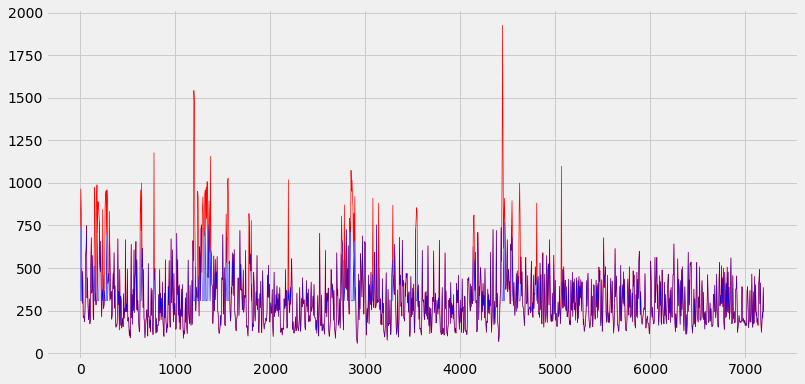

In [123]:
plt.figure(figsize=(12,6))
plt.plot(a,r,color='r',linewidth='0.7')
plt.plot(a,c,color='b',linewidth='0.4')
